In [510]:
###NOTE : GIGO ALERT - This entire homework is based on garbage data.
###Throughout this exercise I was having trouble with the API.  
###On one call I would get approx. 50 transactions and then on the next call the number would drop to approx. 15.
###Also note that the data is bad.  For example, a credit and a debit are both expressed as positive numbers
import os
import plaid
import requests
import datetime
import json
import pandas as pd
import numpy as np
%matplotlib inline

In [511]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [512]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to paid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [513]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

client.Institutions.get(2)

{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': False,
   'input_spec': 'fixed',
   'institution_id': 'ins_25',
   'mfa': [],
   'mfa_code_type': 'numeric',
   'name': 'Ally Bank',
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': []},
  {'country_codes': ['US'],
   'credentials': [{'label': 'Login ID', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_113968',
   'mfa': ['questions'],
   'mfa_code_type': 'numeric',
   'name': 'Amegy Bank of Texas - Personal Banking',
   'products': ['assets', 'auth', 'balance', 'transactions', 'income'],
   'routing_numbers': []}],
 'request_id': 'EeEvBUraBoqB2T0',
 'total': 10399}

In [514]:
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [515]:
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])


### 3. Exchange the public token for an access token

In [516]:
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [517]:
# Get accounts associated with institution
client.Accounts.get(access_token)

{'accounts': [{'account_id': '1da1eLN5Glu7NK6W79ZeuLl1zxd6xxF5XPpZn',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'Lv95RQK6WVCb63XjbeQnC539q1ye11HPKWklV',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'pNe3JlKZz5CEmngLEjpVuWv9D6Eq66sLjQpEP',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [518]:
# Get transactions for institution for specific date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)

# Print JSON output
print(json.dumps(transaction_response['transactions'][:2],indent=4, sort_keys=True))

[
    {
        "account_id": "Qwk5e7x6KJHe61rme3Mqf7EbeN5aRoUp6lw3y",
        "account_owner": null,
        "amount": 500,
        "category": [
            "Travel",
            "Airlines and Aviation Services"
        ],
        "category_id": "22001000",
        "date": "2019-09-03",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "United Airlines",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
        "pending_transaction_id": null,
        "transaction

### 2. Print the categories for each transaction

In [519]:
transactions_df = (transaction_response['transactions'])
#I elected to append the categories into a separate list 
#so that I can take this list with simplified labels and later assign it to a column in the dataframe

transactions_categories = []

#After looking at the data I chose to group the categories by the first label in list unless first label is 'Transfer'
#The reason for this is that the 'Transfers' category contains credits, debits and deposits.
#If we choose to use the first category label'Transfers', we lose valuable information.  
#This still does not account for the fact that certain values are positive when they should be negative: data feed issue
   
for i in transactions_df:
    
    if (i['category'][0]) == "Transfer":
        transactions_categories.append(i['category'][-1])
    
    else:
        transactions_categories.append(i['category'][0])
        
#converted to Series for printing to print vertically and provide an index count to see number of transactions       
print(pd.Series(transactions_categories))


0             Travel
1             Travel
2     Food and Drink
3            Payment
4     Food and Drink
5              Shops
6            Payment
7             Travel
8              Debit
9            Deposit
10        Recreation
11            Travel
12    Food and Drink
13    Food and Drink
14    Food and Drink
15            Credit
16            Travel
17            Travel
18    Food and Drink
19           Payment
20    Food and Drink
21             Shops
22           Payment
23            Travel
24             Debit
25           Deposit
26        Recreation
27            Travel
28    Food and Drink
29    Food and Drink
30    Food and Drink
31            Credit
32            Travel
33            Travel
34    Food and Drink
35           Payment
36    Food and Drink
37             Shops
38           Payment
39            Travel
40             Debit
41           Deposit
42        Recreation
43            Travel
44    Food and Drink
45    Food and Drink
46    Food and Drink
47           

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [520]:
transactions_df = pd.DataFrame(transaction_response['transactions'])

#Below we use the assign function to replace the list under the original 'category' column with the simplified list we created above
transactions_df = transactions_df.assign(category = transactions_categories)

#select columns using filter function   
transactions_df = transactions_df.filter(['date','name','category','amount'])

#In order to reflect that Deposits are the opposite of expenses, multiply by -1.  Allows for correct monthly spending sums later
#the same has been done with 'United Airlines' salary info, but the data is messed up (neg and positive mixed) so the fix is not effective
transactions_df['amount'] = pd.np.where(transactions_df.category.str.contains("Deposit"),transactions_df['amount']*-1, (transactions_df['amount']))
transactions_df['amount'] = pd.np.where(transactions_df.name.str.contains("United Airlines"),transactions_df['amount']*-1, (transactions_df['amount']))

transactions_df


,date,name,category,amount
0,2019-09-03,United Airlines,Travel,-500.00
1,2019-09-01,Uber 072515 SF**POOL**,Travel,6.33
2,2019-08-29,Tectra Inc,Food and Drink,500.00
3,2019-08-28,AUTOMATIC PAYMENT - THANK,Payment,2078.50
4,2019-08-28,KFC,Food and Drink,500.00
5,2019-08-28,Madison Bicycle Shop,Shops,500.00
6,2019-08-19,CREDIT CARD 3333 PAYMENT *//,Payment,25.00
7,2019-08-19,Uber 063015 SF**POOL**,Travel,5.40
8,2019-08-18,ACH Electronic CreditGUSTO PAY 123456,Debit,5850.00
9,2019-08-18,CD DEPOSIT .INITIAL.,Deposit,-1000.00


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [521]:
#I keep getting a key error 'date' message unless I run all of the cells before this one.  Not sure why.
transactions_df['date'] = pd.to_datetime(transactions_df['date'])
transactions_df.set_index('date',  inplace = True )
transactions_df

,name,category,amount
date,,,
2019-09-03,United Airlines,Travel,-500.00
2019-09-01,Uber 072515 SF**POOL**,Travel,6.33
2019-08-29,Tectra Inc,Food and Drink,500.00
2019-08-28,AUTOMATIC PAYMENT - THANK,Payment,2078.50
2019-08-28,KFC,Food and Drink,500.00
2019-08-28,Madison Bicycle Shop,Shops,500.00
2019-08-19,CREDIT CARD 3333 PAYMENT *//,Payment,25.00
2019-08-19,Uber 063015 SF**POOL**,Travel,5.40
2019-08-18,ACH Electronic CreditGUSTO PAY 123456,Debit,5850.00


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [522]:
income_response = client.Income.get(access_token)
print(json.dumps(income_response,indent=4, sort_keys=True))

##United Airlines salary 500USD

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 690,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6000,
        "last_year_income_before_tax": 7285,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "xCIbjgxTKfn96YX"
}


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calulate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [523]:
transactions_df.groupby('category').sum()

,amount
category,
Credit,-12.66
Debit,17550.00
Deposit,-3000.00
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Travel,-464.81


2) Generate a bar chart with the number of transactions for each category

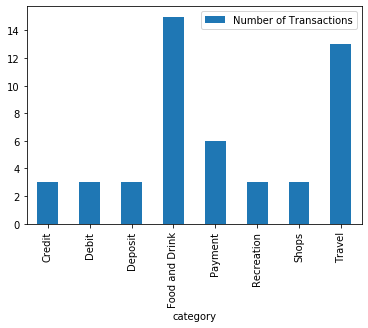

In [524]:
transactions_df.groupby('category').count().plot.bar(y='name',label = 'Number of Transactions')
## For Cam: transactions_df.groupby('category').count().plot.pie()

### Calculate the expenses per month

In [525]:
transactions_df.resample('M').sum()

,amount
date,
2019-06-30,8638.91
2019-07-31,8645.24
2019-08-31,8645.24
2019-09-30,-493.67


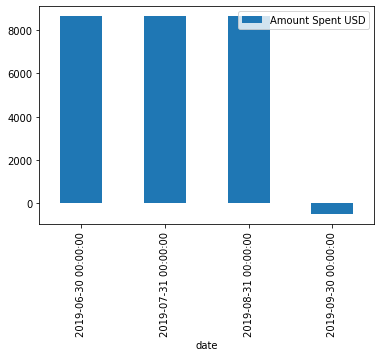

In [526]:
#since we are only looking at 2 months I chose a bar plot, 
#even though time series are often represented with line plots.  The poor data feed makes this excercise difficult
#Would like to learn to relabel the x axis ticks so the formatting is more readable - ie. Aug 2019
transactions_df.resample('M').sum().plot.bar(y = 'amount', label = 'Amount Spent USD')